In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set some visualization styles
sns.set(style="whitegrid")

In [17]:
import pandas as pd

# Reading the CSV file into a pandas DataFrame
df = pd.read_csv("diabetes.csv")

# Display the first 10 rows by passing 10 to the .head() function
print("First 10 rows of the dataset:")
display(df.head(10))

# Get the dimensions of the entire dataset
print(f"\nThe dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Get a statistical summary of the entire dataset
print("\nStatistical summary of the dataset:")
display(df.describe())

First 10 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1



The dataset has 768 rows and 9 columns.

Statistical summary of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


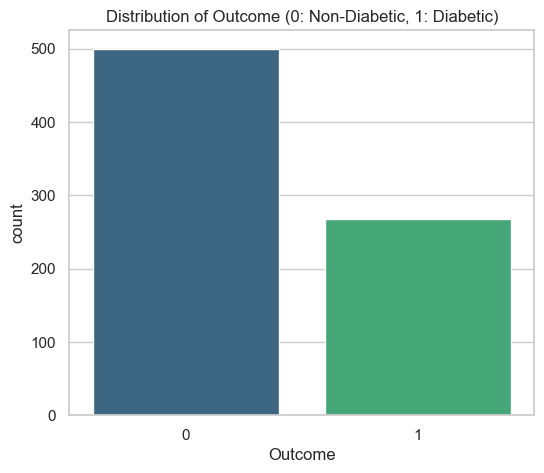

Outcome
0    500
1    268
Name: count, dtype: int64


In [18]:
# a) Outcome Distribution (Corrected Code)

plt.figure(figsize=(6, 5))

# The corrected line of code:
sns.countplot(x='Outcome', data=df, palette='viridis', hue='Outcome', legend=False)

plt.title('Distribution of Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.show()

print(df['Outcome'].value_counts())

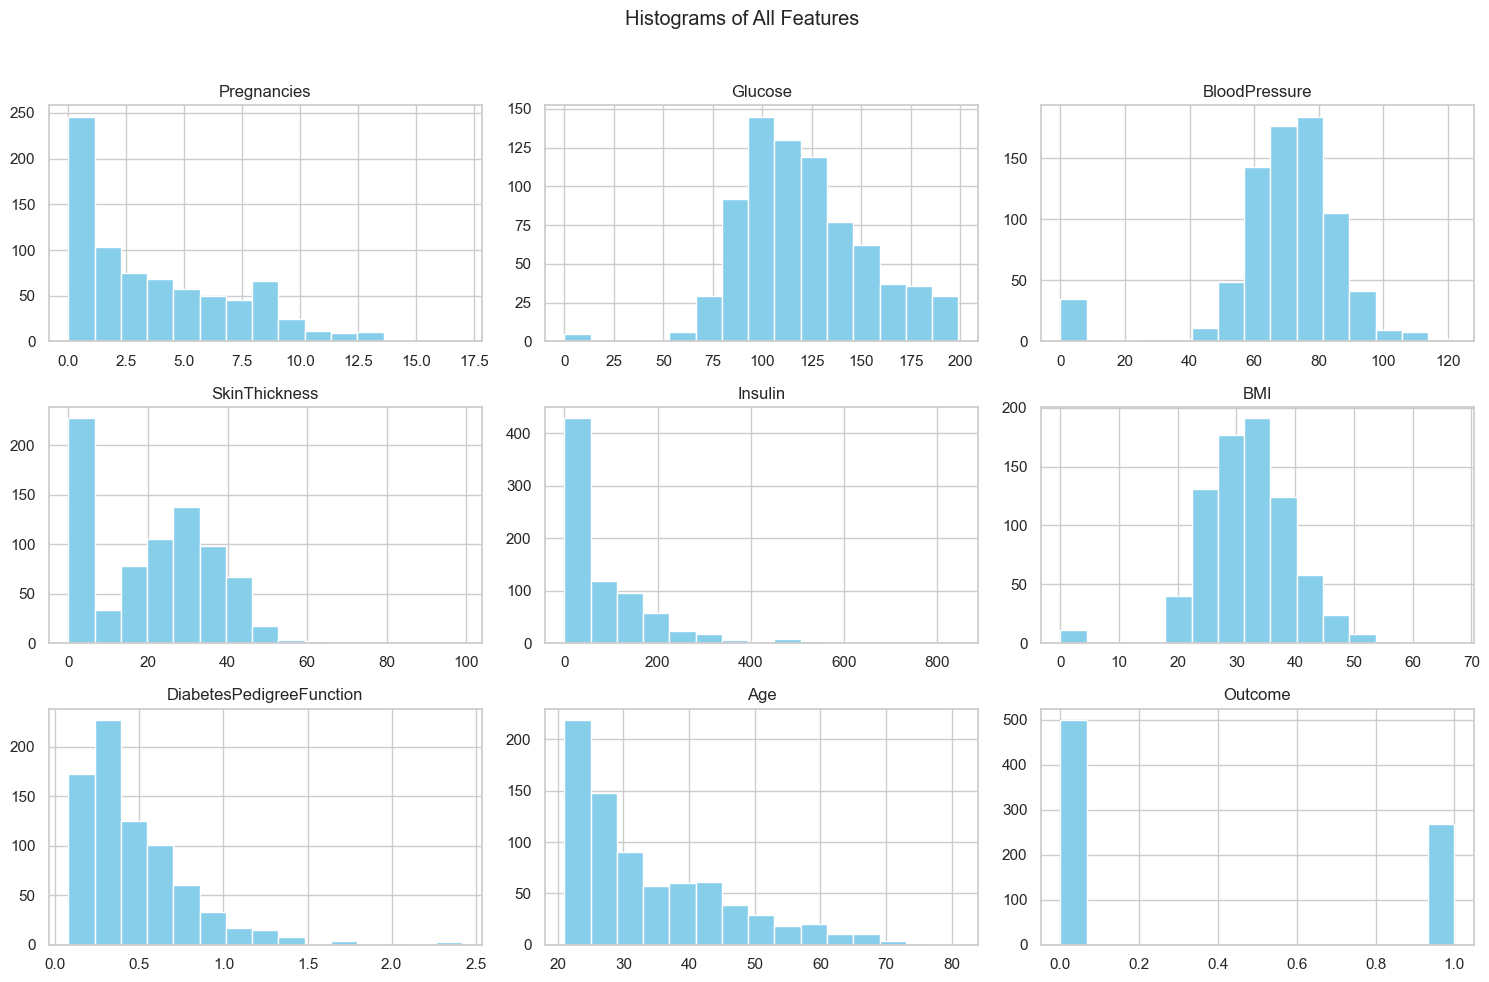

In [19]:
df.hist(bins=15, figsize=(15, 10), layout=(3, 3), color='skyblue')
plt.suptitle('Histograms of All Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

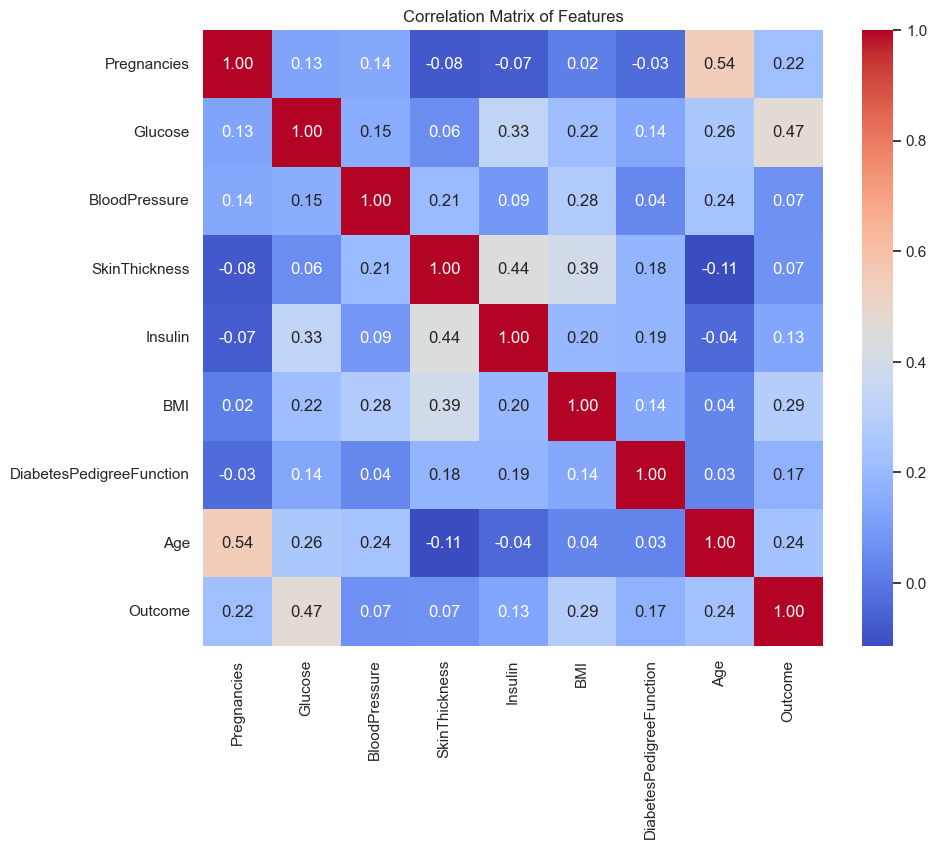

In [20]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [6]:
# X contains all columns except 'Outcome'
x = df.drop(columns="Outcome", axis=1)

# y contains only the 'Outcome' column
y = df["Outcome"]


In [7]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

print("First 5 rows of scaled data:")
print(x_scaled[:5])

First 5 rows of scaled data:
[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of training data: {x_train.shape}")
print(f"Shape of testing data: {x_test.shape}")

Shape of training data: (614, 8)
Shape of testing data: (154, 8)


In [9]:
# Initialize the SVM classifier with a linear kernel
clf = svm.SVC(kernel="linear")

# Train the model on the training data
clf.fit(x_train, y_train)
print("Model training complete.")

Model training complete.


In [10]:
# Make predictions on the test data
y_pred = clf.predict(x_test)

In [11]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model on the test data is: {test_accuracy:.2f}")

The accuracy of the model on the test data is: 0.72


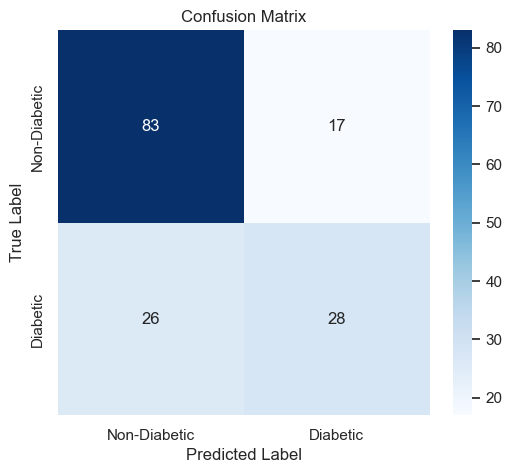

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [13]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))


Classification Report:

              precision    recall  f1-score   support

Non-Diabetic       0.76      0.83      0.79       100
    Diabetic       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



In [14]:
## 7. Building a Predictive System (Corrected Code)

# Get the original feature names from before scaling
feature_names = x.columns

# Sample data for a single prediction
sample_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)

# 1. Create a DataFrame from the sample data with the correct feature names
input_df = pd.DataFrame([sample_data], columns=feature_names)

# 2. Standardize the input DataFrame using the SAME scaler from training
std_data = scaler.transform(input_df)

# 3. Make a prediction
prediction = clf.predict(std_data)

# Print the result
if prediction[0] == 0:
    print("\n✅ Prediction: The person is Non-Diabetic.")
else:
    print("\n⚠️ Prediction: The person is Diabetic.")


⚠️ Prediction: The person is Diabetic.


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assume 'df' is your DataFrame loaded from 'diabetes.csv'
# and 'x' (features) and 'y' (target) are already defined.

# 1. Split your ACTUAL data to create the correct test sets
# This is the most important step. The y_test created here will have 154 samples.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 2. Initialize and train your model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# 3. Generate predictions using the x_test from the split
# y_pred_new will now also have 154 samples.
y_pred_new = model.predict(x_test)

# 4. Calculate accuracy using the CORRECT y_test and y_pred_new
# Both now have the same length, so the error is gone.
new_accuracy = accuracy_score(y_test, y_pred_new)

print(f"The number of samples in y_test is: {len(y_test)}")
print(f"The number of samples in y_pred_new is: {len(y_pred_new)}")
print(f"\nThe new accuracy of the model is: {new_accuracy * 100:.2f}%")

The number of samples in y_test is: 154
The number of samples in y_pred_new is: 154

The new accuracy of the model is: 72.08%
